# Preprocessing of the CIFAR-10 dataset images

## 1. Loading the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


## 2. Defining the number of output classes (Labels) and input shape to be used in the models

In [2]:
num_classes = 10
input_shape = (32, 32, 3)

class_mapper = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}


## 3. Converting labels to one-hot encoded form

In [3]:
# convert labels to one-hot encoded form
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## 4. Normalizing the input data

In [4]:
# normalize color of images (255)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## 5. Data visualization

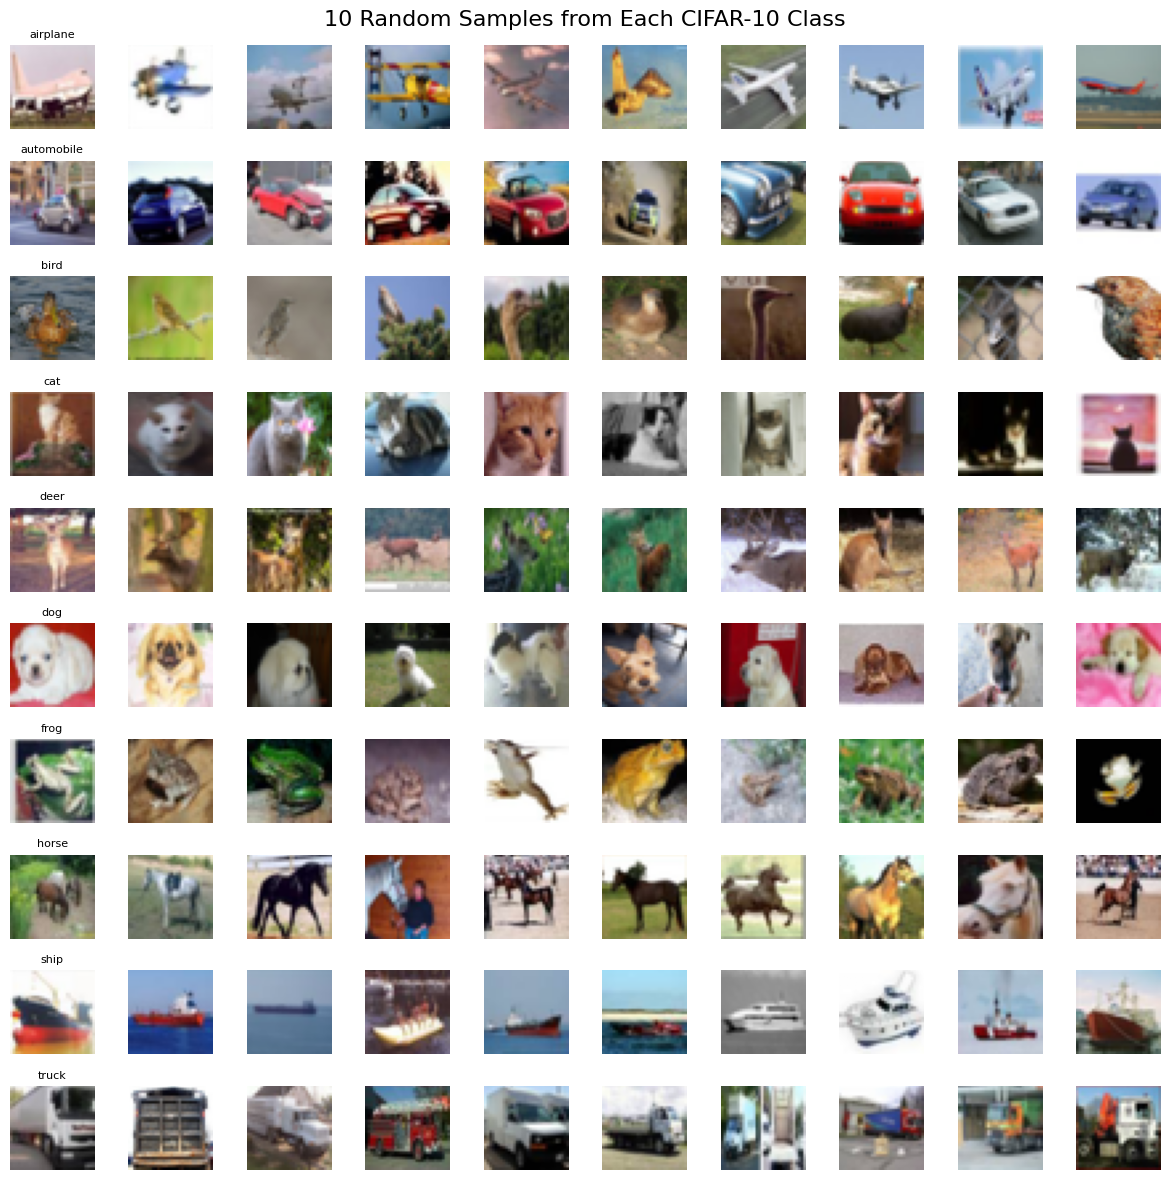

In [5]:
# Plot 10x10 images (10 per class)
samples_per_class = 10
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.suptitle("10 Random Samples from Each CIFAR-10 Class", fontsize=16)

for class_id in range(10):
    idxs = np.where(np.argmax(y_train, axis=1) == class_id) [0]

    selected = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(selected):
        ax = axes[class_id, i]
        ax.imshow(x_train[idx])
        ax.axis('off')
        if i == 0:
            ax.set_title(class_mapper[class_id], fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## 6. Augmentation

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

augmentation_layers = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2)
])

# Model creation

In [7]:
# First we will clear the keras session
from keras.backend import clear_session
clear_session()


In [9]:
# We will start with a basic model:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

model_1 = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        augmentation_layers,
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax"),
     ]
)

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Defining batch size and nº of epochs and compiling the model using the defined parameters:

batch_size = 512
epochs = 50

model_1.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])




In [11]:
# Fitting the model:
history_model_1 = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluating the model:
score_model_1 = model_1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_model_1[0])
print("Test accuracy:", score_model_1[1])

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.1410 - loss: 2.2856 - val_accuracy: 0.2282 - val_loss: 2.2132
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2262 - loss: 2.2031 - val_accuracy: 0.2588 - val_loss: 2.1156
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2615 - loss: 2.1115 - val_accuracy: 0.2828 - val_loss: 2.0306
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2807 - loss: 2.0408 - val_accuracy: 0.3022 - val_loss: 1.9798
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2964 - loss: 1.9955 - val_accuracy: 0.3144 - val_loss: 1.9515
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3122 - loss: 1.9620 - val_accuracy: 0.3214 - val_loss: 1.9251
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3185 - loss: 1.9416 - val_accuracy: 0.3346 - val_loss: 1.8932
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3213 - loss: 1.9246 - val_accuracy: 0.3390 - v

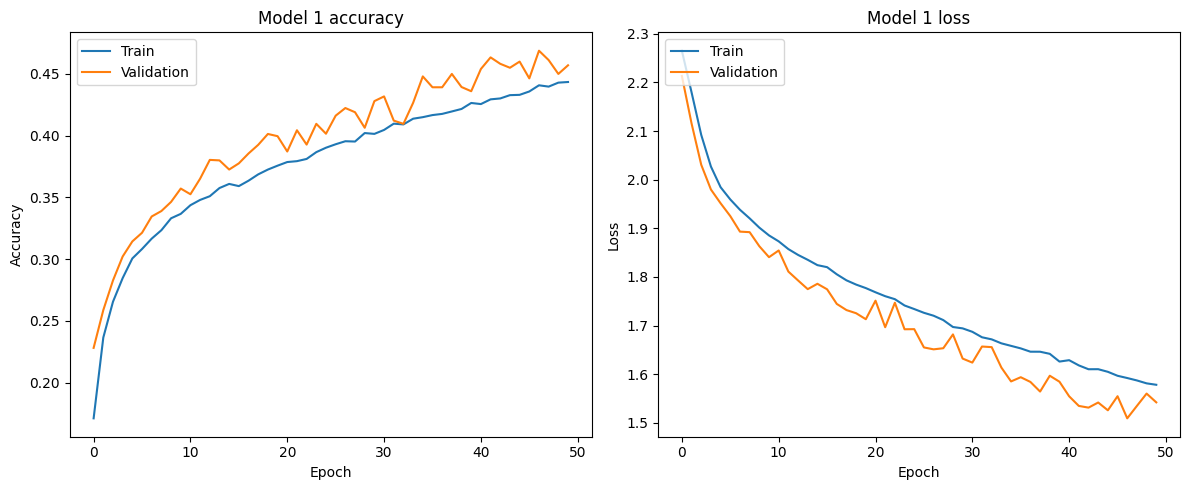

In [12]:
# Plot training & validation accuracy values for model_1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for model_1
plt.subplot(1, 2, 2)
plt.plot(history_model_1.history['loss'])
plt.plot(history_model_1.history['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Get predictions from the model_1
y_pred = model_1.predict(x_test)

# Convert one-hot encoded labels and predictions to class indices
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score, using 'macro' average, as the classes are balanced (6k images per class)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.4635
Recall: 0.4539
F1 Score: 0.4343
